# Machine Learning Model Dev

---

## Import packages

There are some packages for doing descriptive analytics as follows:
- **pandas**: for data manipulation
- **numpy**: for linear algebra calculation
- **matplotlib**: for data visualization
- **seaborn**: for data manipulation
- **plotnine**: for data manipulation

**Note**: that there are more than one package used for making a data visualization. The `plotnine` can be your choice if you are familiar with `ggplot2` on R programming. It will create your visualization beautifully

In [3]:
# Dataframe manipulation
import pandas as pd

# Linear algebra
import numpy as np

# Data visualization with plotnine
from plotnine import *
import plotnine

# Data visualization with matplotlib
import matplotlib.pyplot as plt

# Data partitioning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Grid-search
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import make_scorer

# XGBoost model
import xgboost as xgb

# Save the model
import joblib

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install flask


   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkze

In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Import data set

After importing the data set into Python, the `df_train` is now our data frame. The data frame has a lot of functions and methods that will create spesific outputs about the characteristic of data frame. The method of `columns` will print out all the column names.

### Training set

In [6]:
# Import the training set
df_train = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv',
    usecols = [i for i in range(1, 14)]
)

In [7]:
# Data dimension
print('Data dimension: {} rows and {} columns'.format(len(df_train), len(df_train.columns)))
df_train.head()

Data dimension: 491 rows and 13 columns


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


### Testing data

In [8]:
# Import the testing set
df_test = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv'
)

In [9]:
# Data dimension
print('Data dimension: {} rows and {} columns'.format(len(df_test), len(df_test.columns)))
df_test.head()

Data dimension: 123 rows and 12 columns


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


## Data preprocessing

### Training data

#### Scale measurement

The method of `info` will show us the metadata or information about the columns in a data frame. It undirectly specifies the scale measurement of a given columns in a data frame. However, it can be misleading. So, we must modify the scale measurement or column types based on column characteristic.

In [10]:
# Data frame metadata
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             481 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      462 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         475 non-null    float64
 9   Loan_Amount_Term   478 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 50.0+ KB


In [11]:
# Change column types
df_train = df_train.astype({'Credit_History': object, 'Loan_Status': int})
df_train.select_dtypes(include = ['object']).dtypes

Loan_ID           object
Gender            object
Married           object
Dependents        object
Education         object
Self_Employed     object
Credit_History    object
Property_Area     object
dtype: object

In [12]:
# Summary statistics of categorical columns
for i in df_train.select_dtypes('object').columns:
    print(df_train[i].value_counts(),'\n')

Loan_ID
LP002305    1
LP001715    1
LP002086    1
LP001136    1
LP002529    1
           ..
LP002103    1
LP001790    1
LP001401    1
LP002893    1
LP002777    1
Name: count, Length: 491, dtype: int64 

Gender
Male      393
Female     88
Name: count, dtype: int64 

Married
Yes    324
No     166
Name: count, dtype: int64 

Dependents
0     276
1      85
2      78
3+     43
Name: count, dtype: int64 

Education
Graduate        388
Not Graduate    103
Name: count, dtype: int64 

Self_Employed
No     398
Yes     64
Name: count, dtype: int64 

Credit_History
1.0    380
0.0     68
Name: count, dtype: int64 

Property_Area
Semiurban    186
Urban        155
Rural        150
Name: count, dtype: int64 



#### Handle missing values

In [13]:
# Check missing values
df_train.isna().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

**Note**: Consideration to remove missing values is based on a business logic. The concept of *garbage in garbage out* applies. Without any relevant domain knowledges of loan problem, the interpolation will lead to the biased result.

Instead of dropping the missing values brutally, we try to inspect the relevant variables in the data in order to suggest the consideration for the next analysis

##### `Dependents`

In [14]:
print('Number of missing dependents is about {} rows'.format(df_train['Dependents'].isna().sum()))

Number of missing dependents is about 9 rows


In [15]:
# Replace missing valuess with "0"
df_train['Dependents'].fillna(value = '0', inplace = True) 

##### `Self_Employed`

In [16]:
print('Number of missing Self_Employed is about {} rows'.format(df_train['Self_Employed'].isna().sum()))

Number of missing Self_Employed is about 29 rows


In [17]:
# Replace missing values with "No"
df_train['Self_Employed'].fillna(value = 'No', inplace = True) 

##### `Loan_Amount_Term`

In [18]:
df_train[['Loan_Amount_Term', 'Loan_Status']].groupby('Loan_Status').describe()

Loan_Amount_Term                                             \
                       count        mean        std   min    25%    50%   
Loan_Status                                                               
0                      143.0  341.790210  73.018891  36.0  360.0  360.0   
1                      335.0  341.086567  64.320411  12.0  360.0  360.0   

                           
               75%    max  
Loan_Status                
0            360.0  480.0  
1            360.0  480.0

In [19]:
print('Percentile 20th: {}'.format(df_train['Loan_Amount_Term'].quantile(q = 0.2)))

Percentile 20th: 360.0


In [20]:
# Replace missing values with "360"
df_train['Loan_Amount_Term'].fillna(value = 360, inplace = True)

##### `Credit_History`

In [21]:
# Cross tabulation of credit history and loan status
df_cred_hist = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], margins = True).reset_index()
# Remove index name
df_cred_hist.columns.name = None
# Remove last row for total column attribute
df_cred_hist = df_cred_hist.drop([len(df_cred_hist) - 1], axis = 0)
df_cred_hist.rename(columns = {'Credit_History':'Credit History', 0:'No', 1:'Yes'}, inplace = True)
df_cred_hist

,Credit History,No,Yes,All
0,0.0,62,6,68
1,1.0,74,306,380


In [22]:
# Slice the data frame based on loan status
pos_cred_hist0 = df_train[(df_train['Credit_History'].isna()) & (df_train['Loan_Status'] == 0)]
pos_cred_hist1 = df_train[(df_train['Credit_History'].isna()) & (df_train['Loan_Status'] == 1)]
print('Number of rows with Loan_Status is No but Credit_History is NaN  : {}'.format(len(pos_cred_hist0)))
print('Number of rows with Loan_Status is Yes but Credit_History is NaN : {}'.format(len(pos_cred_hist1)))

Number of rows with Loan_Status is No but Credit_History is NaN  : 12
Number of rows with Loan_Status is Yes but Credit_History is NaN : 31


In [23]:
# Replace the missing values with a specific condition
credit_loan = zip(df_train['Credit_History'], df_train['Loan_Status'])
df_train['Credit_History'] = [
                                0.0 if np.isnan(credit) and status == 0 else
                                1.0 if np.isnan(credit) and status == 1 else
                                credit for credit, status in credit_loan
                             ]

##### `Gender` and `Loan Amount`

In [24]:
# Drop missing values
df_train.dropna(axis = 0, how = 'any', inplace = True)

In [25]:
# Check missing value
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Testing data

#### Scale measurement

In [26]:
# Data frame metadata
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


In [27]:
# Change column types
df_test = df_test.astype({'Credit_History': object})
df_test.select_dtypes(include = ['object']).dtypes

Loan_ID           object
Gender            object
Married           object
Dependents        object
Education         object
Self_Employed     object
Credit_History    object
Property_Area     object
dtype: object

In [28]:
# Summary statistics of categorical columns
for i in df_test.select_dtypes('object').columns:
    print(df_test[i].value_counts(),'\n')

Loan_ID
LP001116    1
LP001488    1
LP002138    1
LP002284    1
LP002328    1
           ..
LP002683    1
LP002054    1
LP002757    1
LP002582    1
LP001616    1
Name: count, Length: 123, dtype: int64 

Gender
Male      96
Female    24
Name: count, dtype: int64 

Married
Yes    74
No     47
Name: count, dtype: int64 

Dependents
0     69
2     23
1     17
3+     8
Name: count, dtype: int64 

Education
Graduate        92
Not Graduate    31
Name: count, dtype: int64 

Self_Employed
No     102
Yes     18
Name: count, dtype: int64 

Credit_History
1.0    95
0.0    21
Name: count, dtype: int64 

Property_Area
Semiurban    47
Urban        47
Rural        29
Name: count, dtype: int64 



#### Handle missing values

In [29]:
# Check missing values
df_test.isna().sum()

Loan_ID              0
Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

##### `Dependents`

In [30]:
print('Number of missing values in Dependents is about {} rows'.format(df_test['Dependents'].isna().sum()))

Number of missing values in Dependents is about 6 rows


In [31]:
# Replace missing values with "0"
df_test['Dependents'].fillna(value = '0', inplace = True)

##### `Self_Employed`

In [32]:
print('Number of missing values in Self_Employed is about {} rows'.format(df_test['Self_Employed'].isna().sum()))

Number of missing values in Self_Employed is about 3 rows


In [33]:
# Replace missing values with "No"
df_test['Self_Employed'].fillna(value = 'No', inplace = True) 

##### `Loan_Amount_Term`

In [34]:
# Replace missing values with "360"
df_test['Loan_Amount_Term'].fillna(value = 360, inplace = True)

##### `Gender`, `Married`, `LoanAmount` and `Credit_History`

In [35]:
# Drop missing values
df_test.dropna(axis = 0, how = 'any', inplace = True)

In [36]:
# Check missing values
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Explanatory data analysis

### The composition of default and not default customers

In [37]:
# Data aggregation between default and not default customers
df_viz_1 = df_train.groupby(['Loan_Status'])['Loan_ID'].count().reset_index(name = 'Total')
# Map the loan status
df_viz_1['Loan_Status'] = df_viz_1['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [38]:
# Show the data
df_viz_1

,Loan_Status,Total
0,Not default,134
1,Default,330


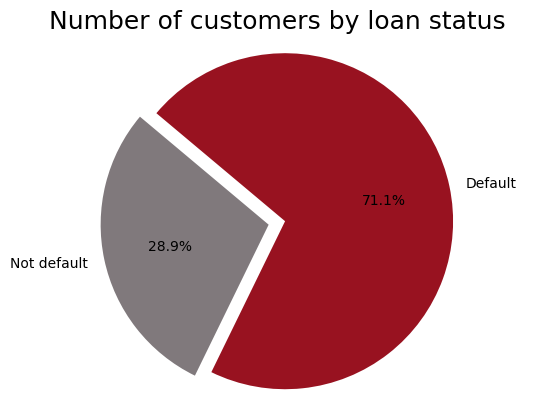

In [39]:
# Figure size
plt.figure(figsize = (6.4,4.8))

# Customize colors and other settings
colors = ['#80797c','#981220']

# Explode 1st slice
explode = (0.1, 0)

# Create a pie chart
plt.pie(
    x = 'Total',
    labels = 'Loan_Status',
    data = df_viz_1,
    explode = explode,
    colors = colors,
    autopct = '%1.1f%%',
    shadow = False,
    startangle = 140
)

# Title and axis
plt.title('Number of customers by loan status', fontsize = 18)
plt.axis('equal')
plt.show()

### The composition of loan status by the dependents

In [40]:
# Data aggregation between loan status and dependents
df_viz_2 = df_train.groupby(['Loan_Status', 'Dependents'])['Loan_ID'].count().reset_index(name = 'Total')
# Map the loan status
df_viz_2['Loan_Status'] = df_viz_2['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [41]:
# Show the data
df_viz_2

,Loan_Status,Dependents,Total
0,Not default,0,77
1,Not default,1,30
2,Not default,2,13
3,Not default,3+,14
4,Default,0,191
5,Default,1,52
6,Default,2,62
7,Default,3+,25


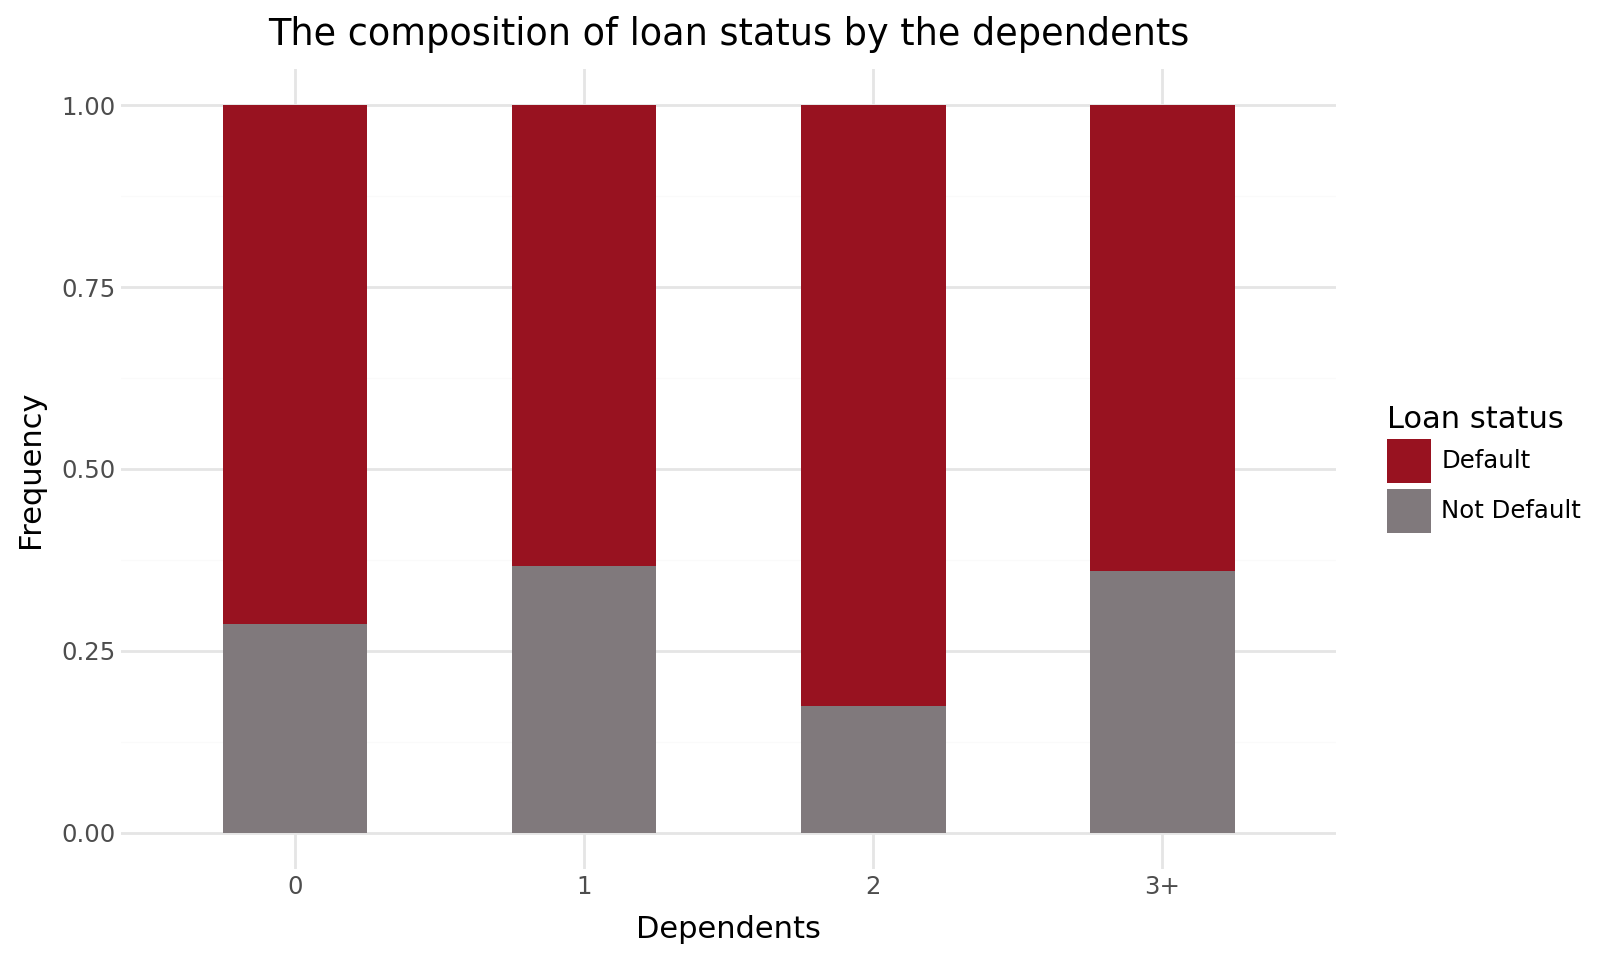

In [42]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(
        data = df_viz_2
    )+
    geom_bar(
        aes(
            x = 'Dependents',
            y = 'Total',
            fill = 'Loan_Status'
        ),
        stat = 'identity',
        position = 'fill',
        width = 0.5
    )+
    labs(
        title = 'The composition of loan status by the dependents',
        fill = 'Loan status'
    )+
    xlab(
        'Dependents'
    )+
    ylab(
        'Frequency'
    )+
    scale_x_discrete(
        limits = ['0', '1', '2', '3+']
    )+
    scale_fill_manual(
        values = ['#981220','#80797c'],
        labels = ['Default', 'Not Default']
    )+
    theme_minimal()
)

### The composition of default customer by the educations

In [43]:
# Data aggregation between loan status and dependents
df_viz_3 = df_train.groupby(['Loan_Status', 'Education'])['Loan_ID'].count().reset_index(name = 'Total')
# Map the loan status
df_viz_3['Loan_Status'] = df_viz_3['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [44]:
# Show the data
df_viz_3

,Loan_Status,Education,Total
0,Not default,Graduate,101
1,Not default,Not Graduate,33
2,Default,Graduate,266
3,Default,Not Graduate,64


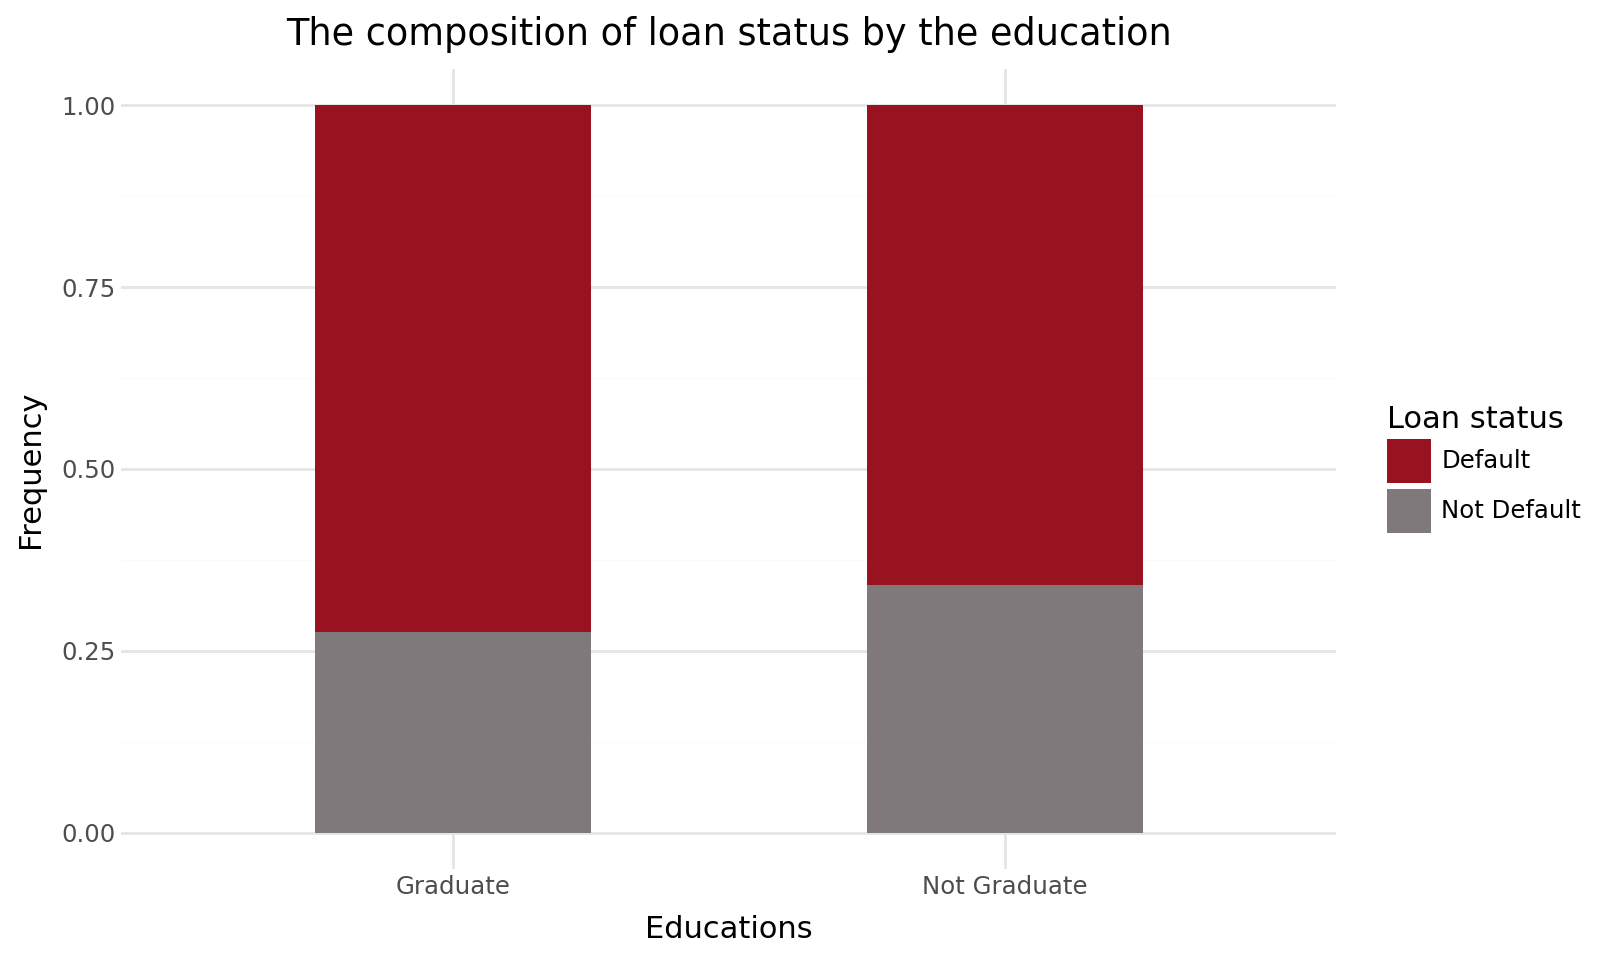

In [45]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(
        data = df_viz_3
    )+
    geom_bar(
        aes(
            x = 'Education',
            y = 'Total',
            fill = 'Loan_Status'
        ),
        stat = 'identity',
        position = 'fill',
        width = 0.5
    )+
    labs(
        title = 'The composition of loan status by the education',
        fill = 'Loan status'
    )+
    xlab(
        'Educations'
    )+
    ylab(
        'Frequency'
    )+
    scale_x_discrete(
        limits = ['Graduate', 'Not Graduate']
    )+
    scale_fill_manual(
        values = ['#981220','#80797c'],
        labels = ['Default', 'Not Default']
    )+
    theme_minimal()
)

### The distribution of applicant incomes by loan status

In [46]:
# Slice the columns
df_viz_4 = df_train[['ApplicantIncome', 'Loan_Status']].reset_index(drop = True)
# Map the loan status
df_viz_4['Loan_Status'] = df_viz_4['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [47]:
# Show the data
df_viz_4.head()

,ApplicantIncome,Loan_Status
0,4547,Default
1,5703,Default
2,4333,Not default
3,4695,Default
4,6700,Default


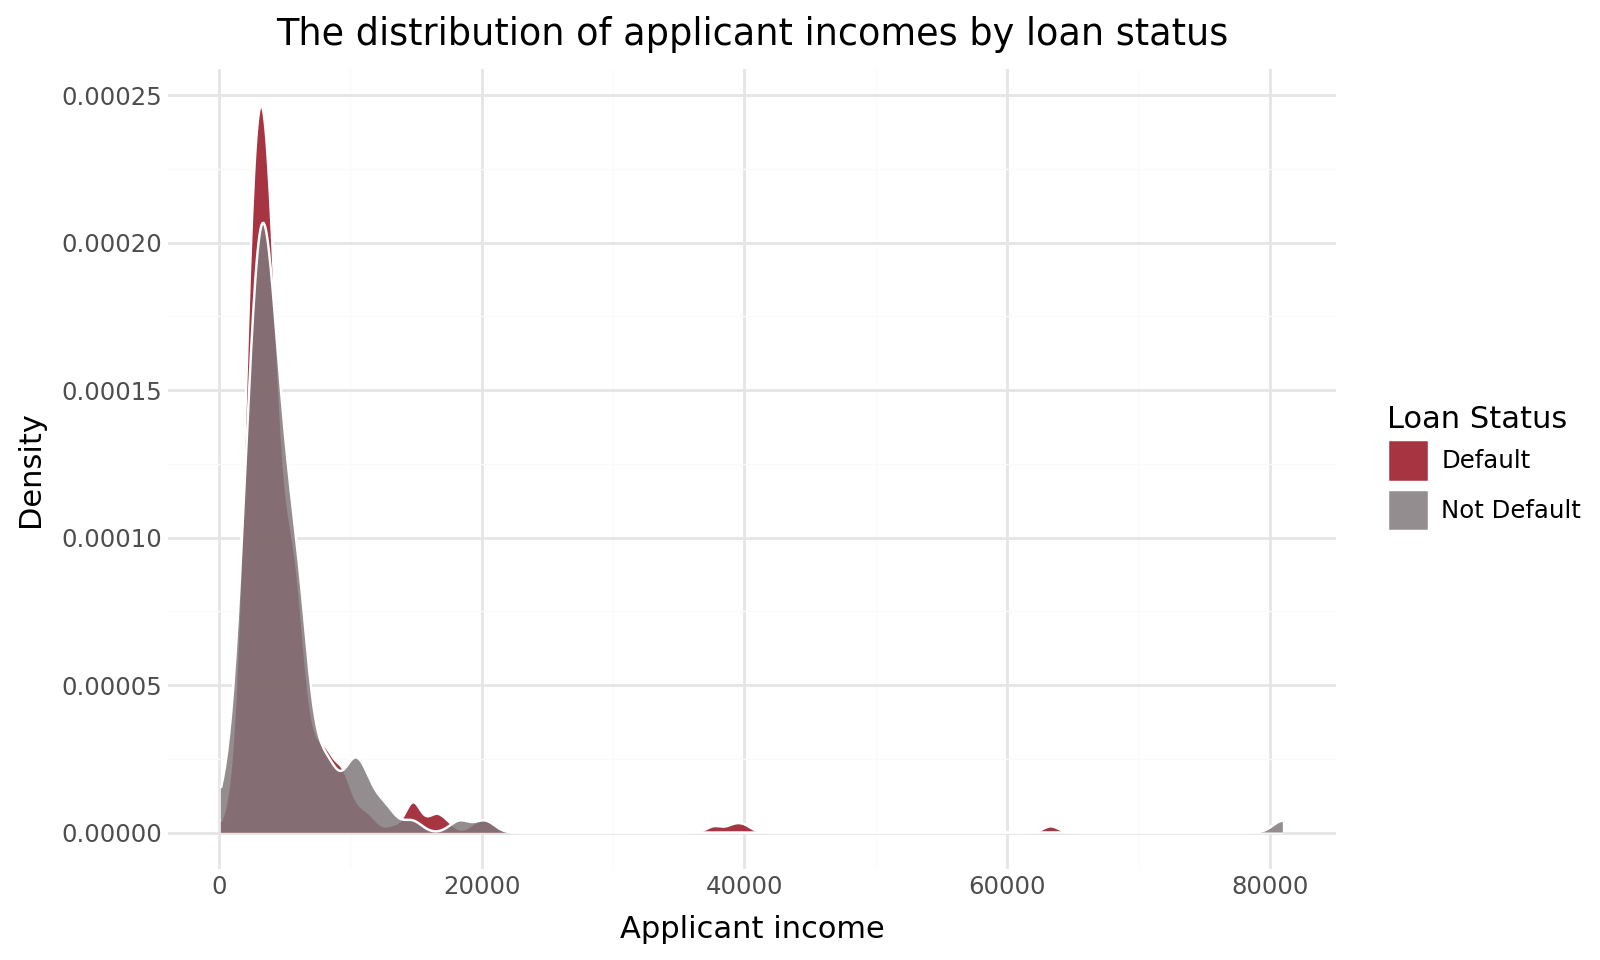

In [48]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(
        data = df_viz_4
    )+
    geom_density(
        aes(
            x = 'ApplicantIncome',
            fill = 'Loan_Status'
        ),
        color = 'white',
        alpha = 0.85
    )+
    labs(
        title = 'The distribution of applicant incomes by loan status'
    )+
    scale_fill_manual(
        name = 'Loan Status',
        values = ['#981220','#80797c'],
        labels = ['Default', 'Not Default']
    )+
    xlab(
        'Applicant income'
    )+
    ylab(
        'Density'
    )+
    theme_minimal()
)

### The distribution of loan amount by loan status

In [49]:
# Slice the columns
df_viz_5 = df_train[['LoanAmount', 'Loan_Status']].reset_index(drop = True)
# Map the loan status
df_viz_5['Loan_Status'] = df_viz_5['Loan_Status'].map(
    {
        0: 'Not default',
        1: 'Default'
    }
)

In [50]:
# Show the data
df_viz_5.head()

,LoanAmount,Loan_Status
0,115.0,Default
1,130.0,Default
2,110.0,Not default
3,96.0,Default
4,230.0,Default


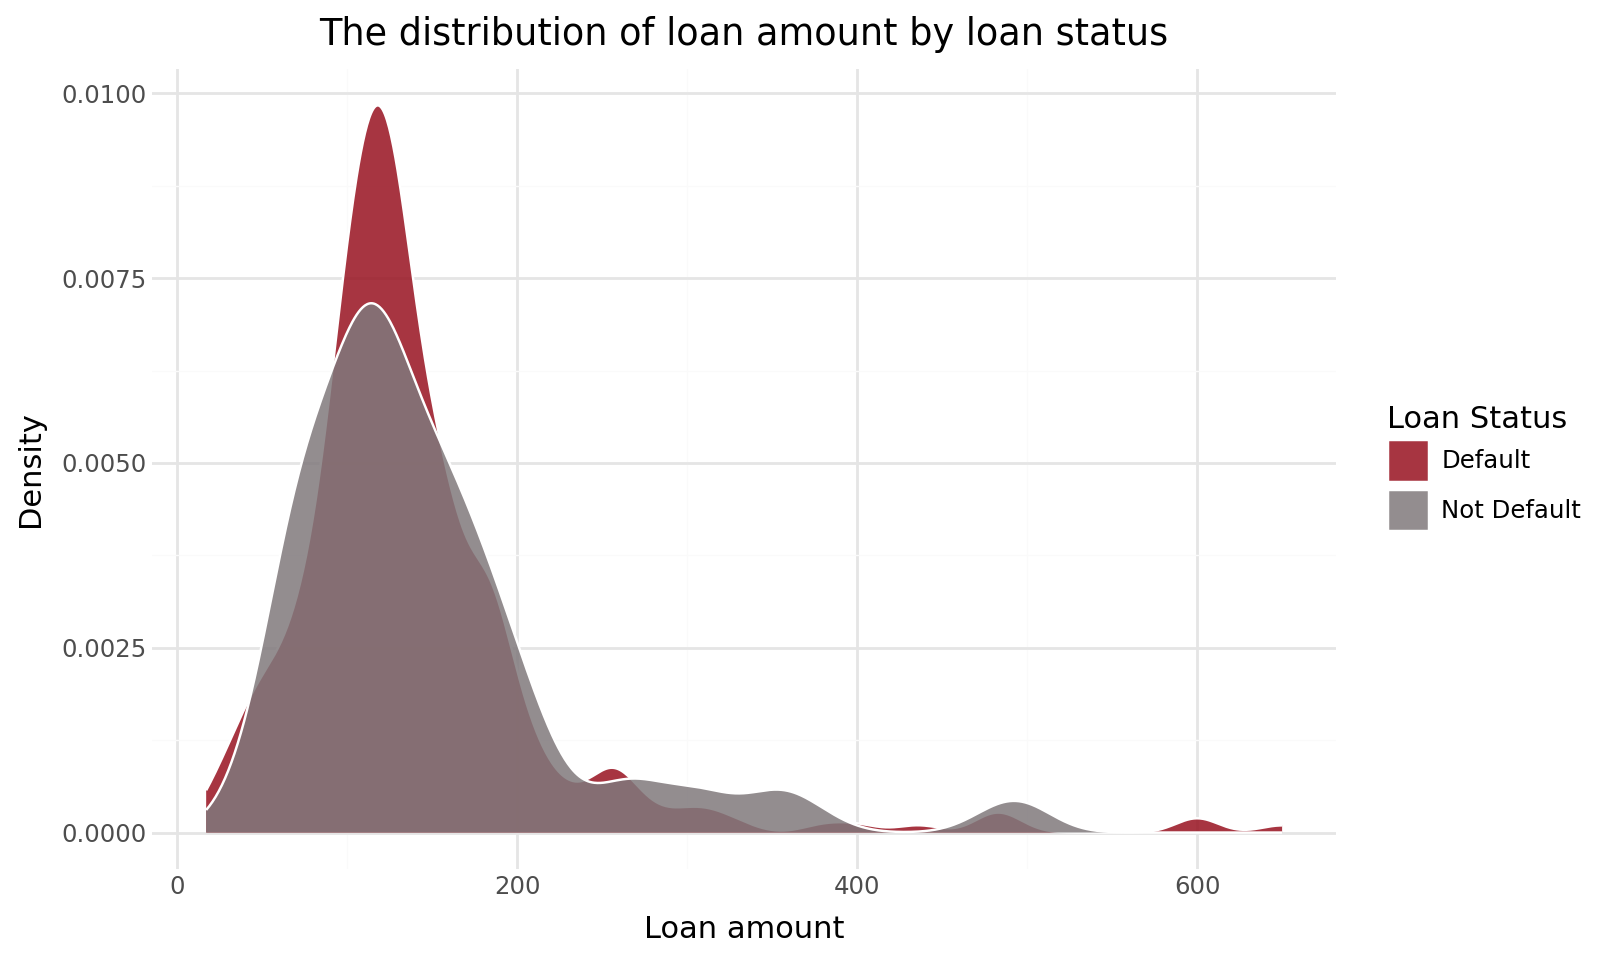

In [51]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(
        data = df_viz_5
    )+
    geom_density(
        aes(
            x = 'LoanAmount',
            fill = 'Loan_Status'
        ),
        color = 'white',
        alpha = 0.85
    )+
    labs(
        title = 'The distribution of loan amount by loan status'
    )+
    scale_fill_manual(
        name = 'Loan Status',
        values = ['#981220','#80797c'],
        labels = ['Default', 'Not Default']
    )+
    xlab(
        'Loan amount'
    )+
    ylab(
        'Density'
    )+
    theme_minimal()
)

## One-hot encoder

In [52]:
# Add new column of Loan_Status with 999 in testing data
df_test['Loan_Status'] = 999
# Concat the training and testing data
df_concat = pd.concat(objs = [df_train , df_test], axis = 0)

In [53]:
# Drop the column of Loan_ID
df_concat.drop(columns = ['Loan_ID'], inplace = True)

In [54]:
# Categorical columns
cols_obj_train = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
print(cols_obj_train)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


In [55]:
# One-hot encoding
df_concat = pd.get_dummies(data = df_concat, columns = cols_obj_train, drop_first = True)
print('Dimension data: {} rows and {} columns'.format(len(df_concat), len(df_concat.columns)))
df_concat.head()

Dimension data: 570 rows and 15 columns


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.0,1,False,False,False,False,False,False,False,True,True,False
1,5703,0.0,130.0,360.0,1,True,True,False,False,True,True,True,True,False,False
2,4333,2451.0,110.0,360.0,0,False,True,False,False,False,False,False,True,False,True
3,4695,0.0,96.0,360.0,1,True,True,False,False,False,True,True,True,False,True
4,6700,1750.0,230.0,300.0,1,True,True,False,True,False,False,False,True,True,False


## Data partitioning

In [56]:
# Unique values of Loan_Status
df_concat['Loan_Status'].value_counts()

Loan_Status
1      330
0      134
999    106
Name: count, dtype: int64

In [57]:
# Training set
df_train = df_concat[df_concat['Loan_Status'].isin([0, 1])].reset_index(drop = True)
print('Dimension data: {} rows and {} columns'.format(len(df_train), len(df_train.columns)))
df_train.head()

Dimension data: 464 rows and 15 columns


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.0,1,False,False,False,False,False,False,False,True,True,False
1,5703,0.0,130.0,360.0,1,True,True,False,False,True,True,True,True,False,False
2,4333,2451.0,110.0,360.0,0,False,True,False,False,False,False,False,True,False,True
3,4695,0.0,96.0,360.0,1,True,True,False,False,False,True,True,True,False,True
4,6700,1750.0,230.0,300.0,1,True,True,False,True,False,False,False,True,True,False


In [58]:
# Testing set
df_test = df_concat[df_concat['Loan_Status'].isin([999])].reset_index(drop = True)
print('Data dimension: {} rows and {} columns'.format(len(df_test), len(df_test.columns)))
df_test.head()

Data dimension: 106 rows and 15 columns


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,3748,1668.0,110.0,360.0,999,True,False,False,False,False,True,False,True,True,False
1,4000,7750.0,290.0,360.0,999,True,True,False,False,True,False,False,True,True,False
2,2625,6250.0,187.0,360.0,999,True,True,False,False,False,False,False,True,False,False
3,3902,1666.0,109.0,360.0,999,True,False,False,False,False,True,False,True,False,False
4,6096,0.0,218.0,360.0,999,True,True,False,False,False,True,False,False,False,False


In [59]:
# Data partitioning >>> training set into training and validation
df_train_final = df_train.reset_index(drop = True)
X = df_train_final[df_train_final.columns[~df_train_final.columns.isin(['Loan_Status'])]]
y = df_train_final['Loan_Status']

# Training = 70% and validation = 30%
X_train, X_val, y_train, y_val = train_test_split(X , y, test_size = 0.3, random_state = 42)
print('Data dimension of training set   :', X_train.shape)
print('Data dimension of validation set :', X_val.shape)

# Testing set
X_test = df_test[df_test.columns[~df_test.columns.isin(['Loan_Status'])]]
print('Data dimension of testing set    :', X_test.shape)

Data dimension of training set   : (324, 14)
Data dimension of validation set : (140, 14)
Data dimension of testing set    : (106, 14)


## Machine learning model development

In [60]:
# XGBoost model
xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    use_label_encoder = False
)

In [61]:
# Define parameter range 
params = {
    'eta': np.arange(0.1, 0.26, 0.05),
    'min_child_weight': np.arange(1, 5, 0.5).tolist(),
    'gamma': [5],
    'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
    'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
}

In [62]:
# Make a scorer from a performance metric or loss function
scorers = {
    'f1_score': make_scorer(f1_score),
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [63]:
# k-fold cross validation
skf = KFold(n_splits = 10, shuffle = True)

In [64]:
# Set up the grid search CV
grid = GridSearchCV(
    estimator = xgb_model,
    param_grid = params,
    scoring = scorers,
    n_jobs = -1,
    cv = skf.split(X_train, np.array(y_train)),
    refit = 'accuracy_score'
)

In [65]:
# Fit the model
grid.fit(X = X_train, y = y_train)

d:\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.5, 0.61, ...], 'eta': array([0.1 , ..., 0.2 , 0.25]), 'gamma': [5], 'min_child_weight': [1.0, 1.5, ...], ...}"
,scoring,"{'accuracy_score': make_scorer(a...hod='predict'), 'f1_score': make_scorer(f...hod='predict'), 'precision_score': make_scorer(p...hod='predict'), 'recall_score': make_scorer(r...hod='predict')}"
,n_jobs,-1
,refit,'accuracy_score'
,cv,<generator ob...002CA66608370>
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [66]:
# Best parameters
grid.best_params_

{'colsample_bytree': 0.94,
 'eta': np.float64(0.25000000000000006),
 'gamma': 5,
 'min_child_weight': 2.0,
 'subsample': 0.61}

In [67]:
# Create a prediction of training 
predicted = grid.predict(X_val)

In [68]:
# Model evaluation - training data
accuracy_baseline = accuracy_score(predicted, np.array(y_val))
recall_baseline = recall_score(predicted, np.array(y_val))
precision_baseline = precision_score(predicted, np.array(y_val))
f1_baseline = f1_score(predicted, np.array(y_val))

print('Accuracy for baseline   :{}'.format(round(accuracy_baseline, 5)))
print('Recall for baseline     :{}'.format(round(recall_baseline, 5)))
print('Precision for baseline  :{}'.format(round(precision_baseline, 5)))
print('F1 Score for baseline   :{}'.format(round(f1_baseline, 5)))

Accuracy for baseline   :0.87143
Recall for baseline     :0.84615
Precision for baseline  :1.0
F1 Score for baseline   :0.91667


## Store the ML model

In [69]:
# Store the model into a pickle file
filename = '../bin/xgboostModel.pkl'
joblib.dump(grid.best_estimator_, filename)

['../bin/xgboostModel.pkl']